In [1]:
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [3]:
print("Total number of training data: ", len(df_train))
print("Total number of testing data: ", len(df_test))

Total number of training data:  3911
Total number of testing data:  3


In [4]:
df_train.head(5)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [5]:
df_train['full_text'][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [6]:
# clean the punctuation within the text
df_train['full_text'] = df_train["full_text"].replace(re.compile(r'[\n\t]'), ' ', regex=True)
df_train['full_text'] = df_train["full_text"].replace(re.compile(r'[^\w\s]'), '', regex=True)

In [7]:
df_train['full_text'][0]

'I think that students would benefit from learning at homebecause they wont have to change and get up early in the morning to shower and do there hair taking only classes helps them because at there house theyll be pay more attention they will be comfortable at home  The hardest part of school is getting ready you wake up go brush your teeth and go to your closet and look at your cloths after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain Then youll have to change with the online classes you can wear anything and stay home and you wont need to stress about what to wear  most students usually take showers before school they either take it before they sleep or when they wake up some students do both to smell good that causes them do miss the bus and effects on there lesson time cause they come late to school when u have online classes u wont need to miss lessons cause you can get everything set up and go take a shower and wh

In [8]:
# analyze word count within essays
df_train['word_cnt'] = df_train['full_text'].apply(lambda x: len(x.split()))

df_train['word_cnt'].describe()

count    3911.000000
mean      429.562516
std       191.490477
min        14.000000
25%       293.000000
50%       400.000000
75%       526.000000
max      1236.000000
Name: word_cnt, dtype: float64

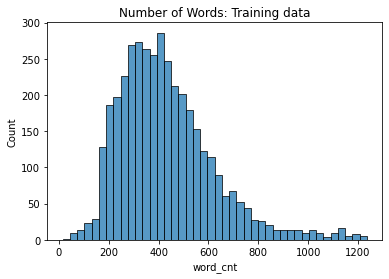

In [9]:
sns.histplot(data=df_train, x="word_cnt")
plt.title("Number of Words: Training data")
plt.show()

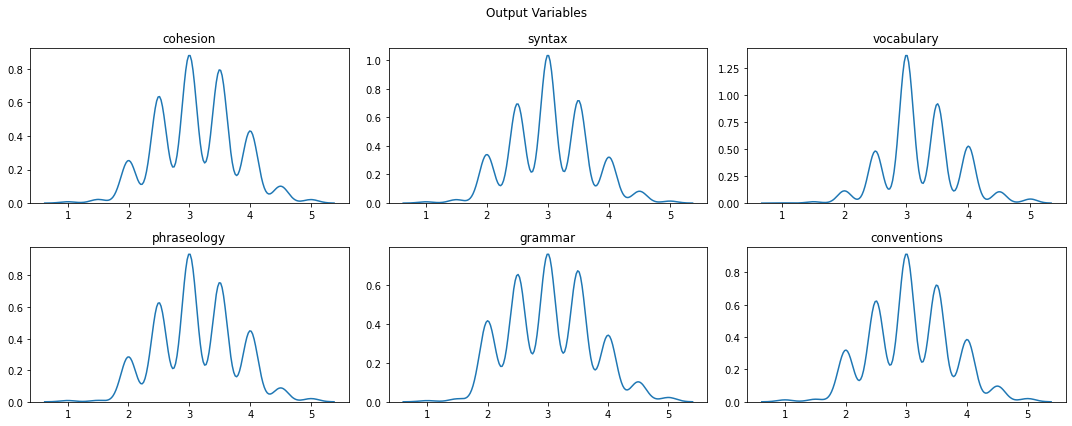

In [10]:
# find distribution pattern for the results from the 6 metrics
columns = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
fig, axes = plt.subplots(2, 3, figsize=(15,6))

for i, columns in enumerate(columns):
    ax = axes.flat[i]
    sns.kdeplot(df_train[columns], legend=True, ax = ax)
    ax.set_title(columns)
    ax.set(xlabel=None, ylabel=None)
    
fig.suptitle('Output Variables')
plt.tight_layout()
plt.show()

<AxesSubplot:>

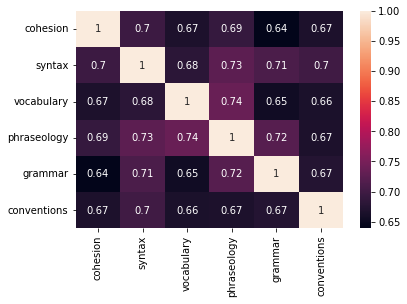

In [11]:
# find correlation between the 6 metrics
columns = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
corr = df_train[columns].corr()
sns.heatmap(corr, annot=True)